# Motif Discovery for AWT Data
The data that was recorded in preperation for the work presented in https://ieeexplore.ieee.org/abstract/document/10271961

In [4]:
import pandas as pd
import stumpy
import numpy as np

import time # just for dev purpose
from IPython.display import display # Just for displaying DF nicely

from itertools import product

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

from util.util import *

In [5]:
# AWT Data Iris
csvPath = "logs/AWT/"
filename = "AWT_data_Iris_March_2023_labelled.csv"
df = pd.read_csv(csvPath + filename, encoding = "latin-1", sep=";")
df

,App,Type,Title,Begin,End,Date,Time,WP flow activity,Case,Notes
0,LockApp.exe,AppTrackItem,Windows Default Lock Screen,06/03/2023 06:44,06/03/2023 06:44,06/03/2023,06:44:28,NaN,NaN,NaN
1,NATIVE,AppTrackItem,NO_TITLE,06/03/2023 06:44,06/03/2023 06:44,06/03/2023,06:44:37,NaN,NaN,NaN
2,Google Chrome,AppTrackItem,SketchUp - Google Chrome,06/03/2023 06:44,06/03/2023 06:44,06/03/2023,06:44:43,NaN,NaN,NaN
3,NVivo,AppTrackItem,Procedural drift.nvp (Saved),06/03/2023 06:44,06/03/2023 06:45,06/03/2023,06:44:55,NaN,NaN,NaN
4,Google Chrome,AppTrackItem,SketchUp - Google Chrome,06/03/2023 06:45,06/03/2023 06:45,06/03/2023,06:45:01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15080,Windows Explorer,AppTrackItem,NO_TITLE,02/04/2023 18:11,02/04/2023 18:11,02/04/2023,18:11:07,Conducting research,Active Window Tracking,NaN
15081,Microsoft Excel,AppTrackItem,tockler-export_2023-03-06_2023-03-21 - Excel,02/04/2023 18:11,02/04/2023 18:11,02/04/2023,18:11:10,Conducting research,Active Window Tracking,NaN
15082,Windows Explorer,AppTrackItem,Categorisation Iris,02/04/2023 18:11,02/04/2023 18:11,02/04/2023,18:11:13,Conducting research,Active Window Tracking,NaN
15083,Microsoft Excel,AppTrackItem,tockler-export_2023-03-06_2023-03-21 - Excel,02/04/2023 18:11,02/04/2023 18:11,02/04/2023,18:11:16,Conducting research,Active Window Tracking,NaN


In [6]:
df = calculate_time_difference(df, "Time", gap=300, n_rolling=100)

# Merge case boundary col, time Difference Boundary, and micro task boundary col in isBoundaryCol
df['isBoundary'] = df.apply(lambda row: row['timeDifferenceBoolStatic'] == True or row['timeDifferenceBoolRolling'] == True, axis=1)

df[["timeDifferenceBoolStatic","timeDifferenceBoolRolling",'isBoundary','timeDifference',"n-running-difference"]]

c:\Users\tomho\OneDrive\Documents\VSCode\TSMDforUILogs\util\util.py:304: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  arr[timeStampCol] = pd.to_datetime(arr[timeStampCol])


,timeDifferenceBoolStatic,timeDifferenceBoolRolling,isBoundary,timeDifference,n-running-difference
0,False,False,False,9,NaN
1,False,False,False,6,NaN
2,False,False,False,12,NaN
3,False,False,False,6,NaN
4,False,False,False,9,NaN
...,...,...,...,...,...
15080,False,False,False,3,150.79
15081,False,False,False,3,150.52
15082,False,False,False,3,150.52
15083,False,False,False,15,150.55


In [7]:
result = df.groupby('timeDifference')['timeDifference'].value_counts()
print(result.sort_index())

timeDifference
0           2
1           2
2          83
3        5661
4         114
         ... 
59790       1
62158       1
74657       1
76578       1
83479       1
Name: count, Length: 471, dtype: int64


In [8]:
result = df.groupby('isBoundary')['isBoundary'].value_counts()
print(result)

print(len(df))

isBoundary
False    12240
True      2845
Name: count, dtype: int64
15085


In [9]:
appDict = createDict(set(df.sort_values(by=['App'])['App'].unique()))
titleDict = createDict(set(df.sort_values(by=['Title'])['Title'].unique()))

df['awt:app:id'] = df.apply(lambda row: get_key(row, appDict, 'App'), axis=1)
df['awt:title:id'] = df.apply(lambda row: get_key(row, titleDict, 'Title'), axis=1)
#print for AWT data
print(f"The number of apps is {len(appDict)} and titles is {len(titleDict)}")
print(df[["App",'Title', 'awt:app:id', 'awt:title:id']])

The number of apps is 41 and titles is 2632
                    App                                         Title  \
0           LockApp.exe                   Windows Default Lock Screen   
1                NATIVE                                      NO_TITLE   
2         Google Chrome                      SketchUp - Google Chrome   
3                 NVivo                  Procedural drift.nvp (Saved)   
4         Google Chrome                      SketchUp - Google Chrome   
...                 ...                                           ...   
15080  Windows Explorer                                      NO_TITLE   
15081   Microsoft Excel  tockler-export_2023-03-06_2023-03-21 - Excel   
15082  Windows Explorer                           Categorisation Iris   
15083   Microsoft Excel  tockler-export_2023-03-06_2023-03-21 - Excel   
15084           Tockler                                       Tockler   

       awt:app:id  awt:title:id  
0               9          1608  
1          

Make the multi dimensional AWT log one dimensional using another tuple generator

Using the ids ['awt:app:id','awt:title:id'] generated earlier in the process based on the dictonaries 

In [10]:
columnsAWT = ['awt:app:id','awt:title:id']
numbersDF = df[columnsAWT]

# Generate unique tuples for indexing the individual combinations of the rows mentioned
unique_df = numbersDF.drop_duplicates(subset=numbersDF.columns, keep='first')
tuples = [tuple(row[columnsAWT]) for i, row in unique_df.iterrows()]
       
df['id'] = df.apply(lambda row: get_id(row, tuples, columns=columnsAWT), axis=1)
# Print the updated DataFrame
print(len(tuples))
print(df['id'])


2671
0           0
1           1
2           2
3           3
4           2
         ... 
15080       4
15081    2089
15082    2088
15083    2089
15084      71
Name: id, Length: 15085, dtype: int64


## Motif discovery

From Time https://stumpy.readthedocs.io/en/latest/Tutorial_STUMPY_Basics.html#Find-a-Motif-Using-STUMP:

Time series motifs are approximately repeated subsequences found within a longer time series. Being able to say that a subsequence is “approximately repeated” requires that you be able to compare subsequences to each other. In the case of STUMPY, all subsequences within a time series can be compared by computing the pairwise z-normalized Euclidean distances and then storing only the index to its nearest neighbor. This nearest neighbor distance vector is referred to as the matrix profile and the index to each nearest neighbor within the time series is referred to as the matrix profile index. Luckily, the stump function takes in any time series (with floating point values) and computes the matrix profile along with the matrix profile indices and, in turn, one can immediately find time series motifs.

In [11]:
starting_row = 0
ending_row = len(df)-1
#Extract ids and rows
ids = df.loc[starting_row:ending_row,'id'].tolist()
rows = [i for i in range(len(df.loc[starting_row:ending_row,'id']))]

window_size = 15

event_series = df.loc[starting_row:ending_row,'id'].values.astype(float)
tm_matrix = stumpy.stump(event_series, window_size)

motif_idx_tm = np.argsort(tm_matrix[:, 0])[0]
nearest_neighbor_idx_tm = tm_matrix[motif_idx_tm, 1]

print(f"The window size is {window_size}")
print(f"The motif is located at index {motif_idx_tm}")
print(f"The nearest neighbor is located at index {nearest_neighbor_idx_tm}\n")

The window size is 15
The motif is located at index 15034
The nearest neighbor is located at index 14980



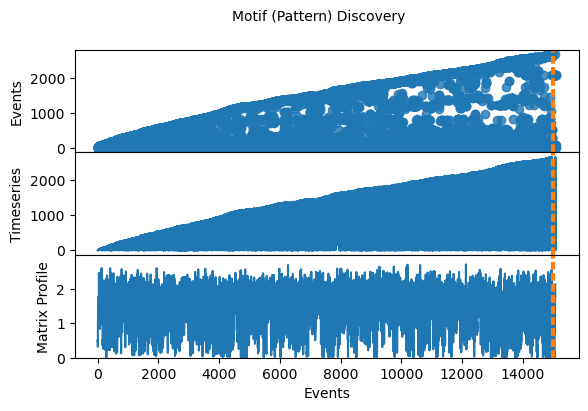

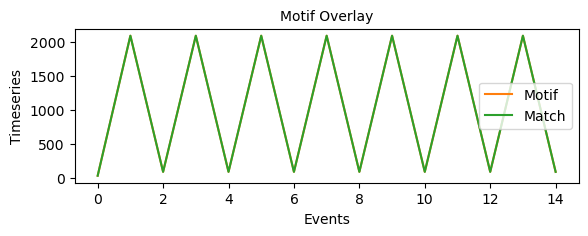

In [12]:
fig, axs = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0}, figsize=(6.5, 4))
plt.suptitle('Motif (Pattern) Discovery', fontsize='10')

#Plot Event data
axs[0].scatter(rows, ids, alpha=0.8)
axs[0].set_ylabel('Events', fontsize='10')
# Plot Timeseries data
axs[1].plot(event_series)
axs[1].set_ylabel('Timeseries', fontsize='10')
rect = Rectangle((motif_idx_tm, 0), window_size, event_series.max(), facecolor='lightgrey')
axs[1].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx_tm, 0), window_size, event_series.max(), facecolor='lightgrey')
axs[1].add_patch(rect)
# Plot Matrix profiles
axs[2].set_xlabel('Events', fontsize ='10')
axs[2].set_ylabel('Matrix Profile', fontsize='10')
axs[2].set_ylim(top=tm_matrix[:, 0].max()*1.1) #displaying the max value with some uplift for space in Graph
axs[2].plot(tm_matrix[:, 0])
# Adding Dashed lines
axs[0].axvline(x=motif_idx_tm, linestyle="dashed", color='C1')
axs[0].axvline(x=nearest_neighbor_idx_tm, linestyle="dashed", color='C1')
axs[1].axvline(x=motif_idx_tm, linestyle="dashed", color='C1')
axs[1].axvline(x=nearest_neighbor_idx_tm, linestyle="dashed", color='C1')
axs[2].axvline(x=motif_idx_tm, linestyle="dashed", color='C1')
axs[2].axvline(x=nearest_neighbor_idx_tm, linestyle="dashed", color='C1')
plt.show()

# Display Pattern overlay
fig, ax = plt.subplots(figsize=(6.5, 2))
plt.title('Motif Overlay', fontsize='10')
ax.set_xlabel("Events", fontsize='10')
ax.set_ylabel("Timeseries", fontsize='10')
# Plot motif and nearest neighbor window
ax.plot(event_series[motif_idx_tm:motif_idx_tm+window_size], color='C1', label="Motif")
ax.plot(event_series[nearest_neighbor_idx_tm:nearest_neighbor_idx_tm+window_size], color='C2', label="Match")
plt.legend(loc="best",fontsize=10)
plt.show()

In [ ]:
# Print the desired rows
display(df.iloc[motif_idx_tm:min(motif_idx_tm + window_size, len(df))])
display(df.iloc[nearest_neighbor_idx_tm:min(nearest_neighbor_idx_tm + window_size, len(df))])